In [188]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mplsoccer.pitch import VerticalPitch
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [171]:
response = requests.get(
    'https://www.sofascore.com/charlotte-fc-new-york-red-bulls/gabsiHld#11766015',
    headers={
        'user-agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'})

In [172]:
response.status_code

200

In [173]:
soup = BeautifulSoup(response.text, 'html.parser')

In [174]:
soup.select('g[cursor="pointer"]')

[]

In [175]:
import requests

headers = {
    'authority': 'api.sofascore.com',
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'if-none-match': 'W/"a3b71f0c70"',
    'origin': 'https://www.sofascore.com',
    'referer': 'https://www.sofascore.com/',
    'sec-ch-ua': '"Google Chrome";v="119", "Chromium";v="119", "Not?A_Brand";v="24"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36',
}

response = requests.get('https://api.sofascore.com/api/v1/event/11766015/shotmap', headers=headers)

In [176]:
response.status_code

200

In [177]:
headers['If-Modified-Since'] = 'Sun, 19 Nov 2023 00:00:00 GMT'

In [178]:
response = requests.get('https://api.sofascore.com/api/v1/event/11766015/shotmap', headers=headers)

In [179]:
response.status_code

200

In [180]:
shots = response.json()

In [181]:
shots

{'shotmap': [{'player': {'name': 'Justin Meram',
    'slug': 'justin-meram',
    'shortName': 'J. Meram',
    'position': 'M',
    'userCount': 275,
    'id': 149138},
   'isHome': False,
   'shotType': 'miss',
   'situation': 'assisted',
   'playerCoordinates': {'x': 9.7, 'y': 41.3, 'z': 0},
   'bodyPart': 'right-foot',
   'goalMouthLocation': 'left',
   'goalMouthCoordinates': {'x': 0, 'y': 66.9, 'z': 18.1},
   'xg': 0.071312941610813,
   'id': 2288015,
   'time': 90,
   'addedTime': 4,
   'timeSeconds': 5619,
   'draw': {'start': {'x': 41.3, 'y': 9.7},
    'end': {'x': 33.1, 'y': 0},
    'goal': {'x': 33.1, 'y': 81.9}},
   'reversedPeriodTime': 1,
   'reversedPeriodTimeSeconds': 681,
   'incidentType': 'shot'},
  {'player': {'name': 'John Tolkin',
    'slug': 'john-tolkin',
    'shortName': 'J. Tolkin',
    'position': 'D',
    'userCount': 328,
    'id': 1015186},
   'isHome': True,
   'shotType': 'miss',
   'situation': 'assisted',
   'playerCoordinates': {'x': 45.4, 'y': 14.7, 'z

In [182]:
df = pd.json_normalize(shots['shotmap'])

In [186]:
#Clean out uneccessary data/Adjust accordingly based on what you want to do with data
columns_to_drop = ['draw.block.x','draw.block.y','player.lastName','blockCoordinates.x','blockCoordinates.y','blockCoordinates.z']
df = df.drop(columns=columns_to_drop)

In [187]:
df

,isHome,shotType,situation,bodyPart,goalMouthLocation,xg,id,time,addedTime,timeSeconds,...,goalMouthCoordinates.z,draw.start.x,draw.start.y,draw.end.x,draw.end.y,draw.goal.x,draw.goal.y,goalType,xgot,player.firstName
0,False,miss,assisted,right-foot,left,0.071313,2288015,90,4.0,5619,...,18.1,41.3,9.7,33.1,0,33.1,81.9,NaN,NaN,NaN
1,True,miss,assisted,left-foot,high,0.005525,2288001,80,NaN,4771,...,88.9,14.7,45.4,55.8,0,55.8,11.1,NaN,NaN,NaN
2,True,goal,assisted,right-foot,low-left,0.275613,2287999,78,NaN,4670,...,18.4,35.2,10.6,47.4,0,47.4,81.6,regular,0.3121,Elias Manoel
3,False,miss,assisted,right-foot,right,0.026563,2287991,75,NaN,4444,...,5.6,37.7,24.4,79.8,0,79.8,94.4,NaN,NaN,NaN
4,False,block,regular,right-foot,low-centre,0.025936,2287989,72,NaN,4268,...,5.6,35.9,26.4,50.1,0,50.1,94.4,NaN,NaN,Kerwin Calderón Vargas
5,False,block,regular,right-foot,low-right,0.029004,2287990,71,NaN,4257,...,19.0,60.0,19.5,53.6,0,53.6,81.0,NaN,NaN,NaN
6,False,goal,assisted,right-foot,high-left,0.265983,2287984,64,NaN,3807,...,25.3,41.9,6.7,47.1,0,47.1,74.7,regular,0.7542,Patrick Agyemang
7,True,post,assisted,right-foot,left,0.092031,2287979,62,NaN,3673,...,10.8,42.1,14.4,44.7,0,44.7,89.2,NaN,NaN,NaN
8,True,goal,assisted,left-foot,low-right,0.562349,2287969,56,NaN,3335,...,1.9,48.2,7.1,52.2,0,52.2,98.1,regular,0.8570,NaN
9,True,miss,corner,right-foot,left,0.019010,2287965,55,NaN,3252,...,13.9,63.1,23.4,34.5,0,34.5,86.1,NaN,NaN,NaN


In [150]:
#set general use colors (I chose colors based on team colors change accordingly)
text_color = '#1A85C8'

In [191]:
#This is to filter out shots for home vs away team in this case NYRB is Home and CLTFC is Away
df = df[df['isHome'] == True]

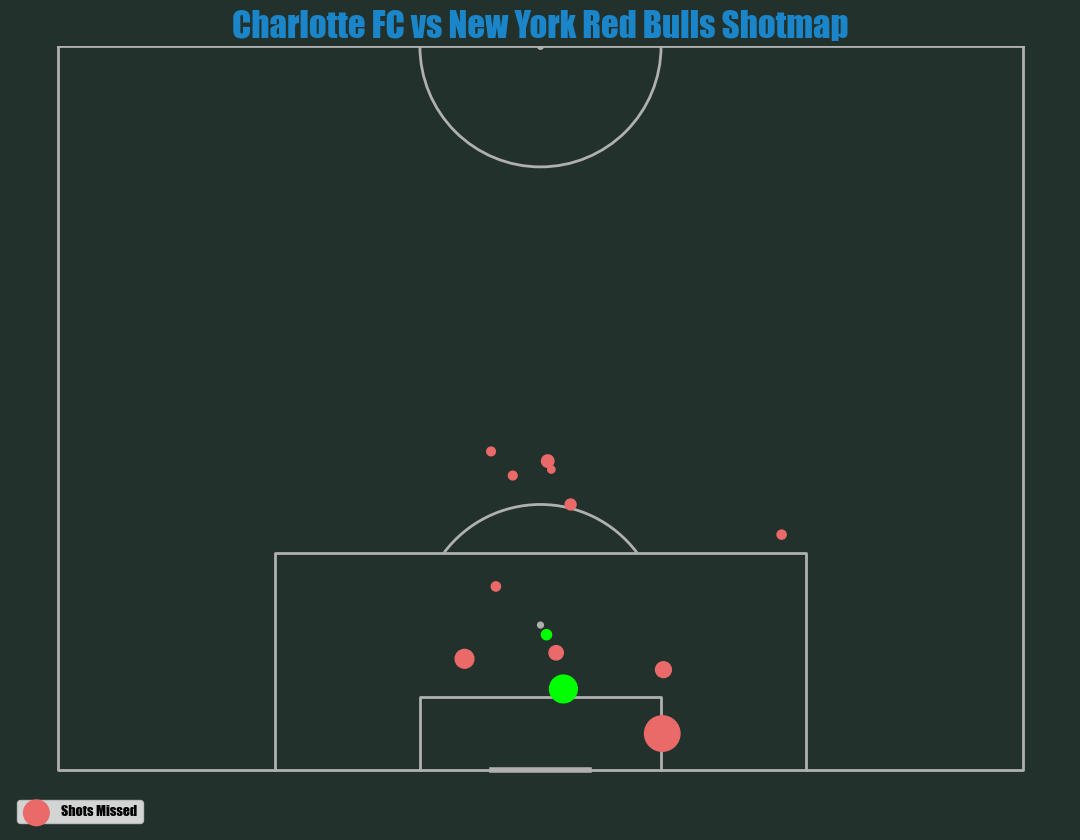

In [169]:
# Create a VerticalPitch with half=True
pitch = VerticalPitch(half=True,
                      pad_top=-60,
                     pad_bottom=65)

# Get the figure and axis objects from the pitch
fig, ax = pitch.draw(figsize=(13, 8.5))

# Set the background color of the figure and axis
fig.set_facecolor('#22312B')
ax.set_facecolor('#22312B')

data['color'] = '#ea6969'

# Change the color to '#00FF00' where shotType is 'goal'
data.loc[data['shotType'] == 'goal', 'color'] = '#00FF00'

# Draw the scatter plot on the main pitch
plt.scatter(data['draw.start.x'], data['draw.start.y'], c=data['color'], marker='o', s=data['xg']*1500, label='Shots Missed')
# Customize the scatter plot as needed
plt.title('Charlotte FC vs New York Red Bulls Shotmap', c = text_color,fontsize= 25)
plt.rcParams["font.family"]= "Impact"

# Show the legend
ax.legend()

plt.show()

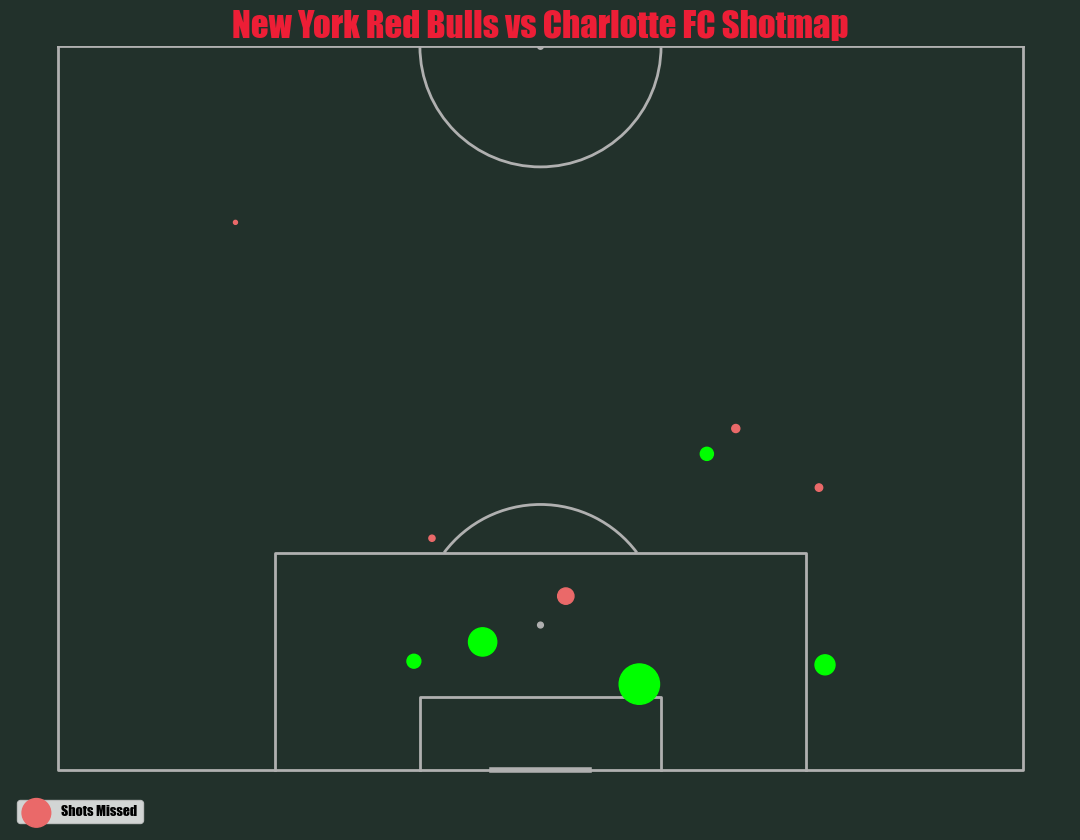

In [197]:
# Create a VerticalPitch with half=True
pitch = VerticalPitch(half=True,
                      pad_top=-60,
                     pad_bottom=65)

# Get the figure and axis objects from the pitch
fig, ax = pitch.draw(figsize=(13, 8.5))

# Set the background color of the figure and axis
fig.set_facecolor('#22312B')
ax.set_facecolor('#22312B')

df['color'] = '#ea6969'

# Change the color to '#00FF00' where shotType is 'goal'
df.loc[df['shotType'] == 'goal', 'color'] = '#00FF00'

# Draw the scatter plot on the main pitch
plt.scatter(df['draw.start.x'], df['draw.start.y'], c=df['color'], marker='o', s=df['xg']*1500, label='Shots Missed')
# Customize the scatter plot as needed
plt.title('New York Red Bulls vs Charlotte FC Shotmap', c = '#ED1E36' ,fontsize= 25)
plt.rcParams["font.family"]= "Impact"

# Show the legend
ax.legend()

plt.show()
#notes for this shotmap, I made 2 different dataframes that held one teams shot data and the other teams shot data
#this is why for this code I use df and for the other one I use data